In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\uri.itai\Downloads\archive (1)\diabetes.csv")

In [4]:
data.shape

(768, 9)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# we note that there are no nulls

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [57]:
# what do this to get zeros
# can you check if the ranges are valid?

In [38]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [22]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [23]:
data.Outcome.value_counts(normalize = True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [12]:
data.skew(), 

(Pregnancies                 0.901674
 Glucose                     0.173754
 BloodPressure              -1.843608
 SkinThickness               0.109372
 Insulin                     2.272251
 BMI                        -0.428982
 DiabetesPedigreeFunction    1.919911
 Age                         1.129597
 Outcome                     0.635017
 dtype: float64,)

In [13]:
data.kurtosis()

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

In [14]:
data.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [16]:
data.Insulin.value_counts(normalize = True)

0      0.486979
105    0.014323
140    0.011719
130    0.011719
120    0.010417
         ...   
271    0.001302
270    0.001302
108    0.001302
112    0.001302
846    0.001302
Name: Insulin, Length: 186, dtype: float64

In [17]:
# so many zeros 

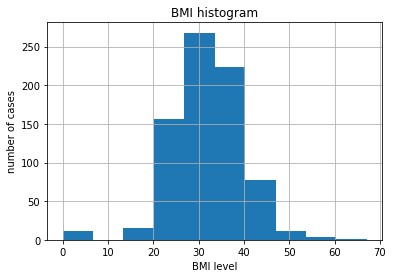

In [29]:
data.BMI.hist()
plt.xlabel('BMI level')
plt.ylabel('number of cases')
plt.title('BMI histogram')
plt.show()

In [58]:
# can we ignore the zero?
# after omitting the zero can you geuss which disturbution is it?

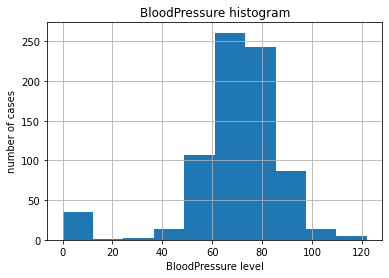

In [60]:
data.BloodPressure.hist()
plt.xlabel('BloodPressure level')
plt.ylabel('number of cases')
plt.title('BloodPressure histogram')
plt.show()

In [ ]:
#same here about the zero
# go over the rest of the features 

In [30]:
data.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [27]:
np.cumsum(data.Pregnancies.value_counts(normalize = True))

1     0.175781
0     0.320312
2     0.454427
3     0.552083
4     0.640625
5     0.714844
6     0.779948
7     0.838542
8     0.888021
9     0.924479
10    0.955729
11    0.970052
13    0.983073
12    0.994792
14    0.997396
15    0.998698
17    1.000000
Name: Pregnancies, dtype: float64

In [ ]:
#90% of the women has less than 10 pregnenacies 

In [31]:
data.groupby('Pregnancies').mean()['Outcome']

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

In [32]:
# note that over the many pregnancy are very small smaple 
#thus we will use Laplase smoothning with a =1 K =3 (the ration )

In [35]:
(data.groupby('Pregnancies').sum()['Outcome'] + 1)/(data.groupby('Pregnancies').count()['Outcome'] + 3)

Pregnancies
0     0.342105
1     0.217391
2     0.188679
3     0.358974
4     0.338028
5     0.366667
6     0.320755
7     0.541667
8     0.560976
9     0.612903
10    0.407407
11    0.571429
12    0.416667
13    0.461538
14    0.600000
15    0.500000
17    0.500000
Name: Outcome, dtype: float64

In [36]:
# for 6 pregnancies it is the most likely to have diabities 

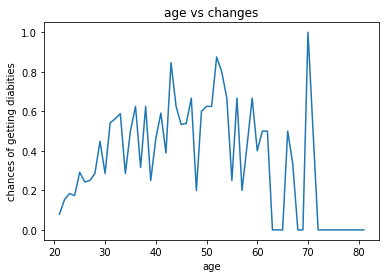

In [41]:
data.groupby('Age').mean()['Outcome'].plot()
plt.xlabel('age')
plt.ylabel('chances of getting diabities')
plt.title('age vs changes')
plt.show()

In [42]:
# we note that the graph is very coares 
# thus we will use the decade

In [44]:
data['decades'] = data.Age.apply(lambda x: x//10)

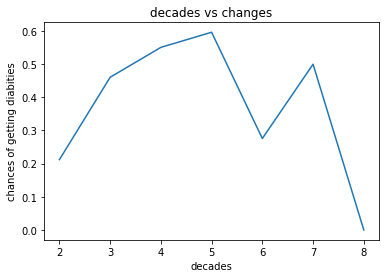

In [45]:
data.groupby('decades').mean()['Outcome'].plot()
plt.xlabel('decades')
plt.ylabel('chances of getting diabities')
plt.title('decades vs changes')
plt.show()

In [46]:
# this graph is  still not smooth but we can learn from it


In [49]:
X, y = data[data.columns[:-1]] , data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
y_train.mean(), y_test.mean()

(0.3540856031128405, 0.33858267716535434)

In [54]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,3.782101,121.295720,69.984436,20.525292,79.237354,31.969844,0.473089,33.190661,0.354086
std,3.277187,32.358526,18.008763,15.501504,115.642548,7.649192,0.341989,11.731010,0.478701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,26.925000,0.244250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.383500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,125.750000,36.500000,0.614500,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
 X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.00000,254.000000
mean,3.972441,120.082677,67.326772,20.559055,80.937008,32.038583,0.469421,33.34252,0.338583
std,3.552434,31.224374,21.758636,16.858937,114.652301,8.354829,0.309271,11.84171,0.474162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.00000,0.000000
25%,1.000000,98.250000,60.500000,0.000000,0.000000,28.050000,0.239250,24.00000,0.000000
50%,3.000000,112.000000,72.000000,23.000000,26.000000,32.850000,0.357000,29.00000,0.000000
75%,6.000000,140.750000,78.000000,33.000000,129.500000,36.750000,0.651250,40.00000,1.000000
max,13.000000,197.000000,114.000000,99.000000,680.000000,57.300000,1.699000,67.00000,1.000000


In [56]:
#the samples are not the same but similar 